# Word Embeddings using TensorFlow 2.0

In word embedding, each word is a unit. Each word is represented by some real-valued vector. The values of the vector of each word are learned in a way that similar words have similar kinds of vector values. It is because it is also considering the context of the word and relationship of words to each other. These vector values are learned in a deep neural fashion.

A word embedding is a learned representation for text where semantically similar words have a similar representation of a vector.

One of the benefits of using dense and low-dimensional vectors is computational: the majority of neural network toolkits do not play well with very high-dimensional, sparse vectors. … The main benefit of the dense representations is generalization power: if we believe some features may provide similar clues, it is worthwhile to provide a representation that is able to capture these similarities.

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

In [3]:
#remember to enable the eager_execution at the very first after tensorflow importing 
tf.compat.v1.enable_eager_execution()


In [6]:
from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_datasets as tfds


So now we will learn to train our own deep learning model to learn the embedding from scratch on our dataset.

For this example, we have collected the dataset of the IMDB movie review dataset that is publicly available. We have loaded the dataset from the TensorFlow Load() function because this dataset is already imported in Tensroflow data API.


In [7]:
(train_data, test_data), info = tfds.load(
    'imdb_reviews/subwords8k', 
    split = (tfds.Split.TRAIN, tfds.Split.TEST), 
    with_info=True, as_supervised=True)

In [14]:
#Get the vocab size from the 'text' feature.

encoder = info.features['text'].encoder
vocab_size = encoder.vocab_size

`padded_batch`will fix the size of each movie review to standard length so that the model would have all the review of same length.

In [15]:
padded_shapes = ([None],())
train_batches = train_data.shuffle(1000).padded_batch(10, padded_shapes = padded_shapes)
test_batches = test_data.shuffle(1000).padded_batch(10, padded_shapes = padded_shapes)

train_batch, train_labels = next(iter(train_batches))
train_batch.numpy()

array([[  62,    9,  624, ...,    0,    0,    0],
       [  62,   32,    9, ...,    0,    0,    0],
       [ 753, 5524, 2317, ...,    0,    0,    0],
       ...,
       [  19, 7697,   57, ...,   64, 3870, 7975],
       [  19,  213,  728, ...,    0,    0,    0],
       [ 492,  270, 8002, ...,    0,    0,    0]])

### Create a simple model

The architecture of this model is pretty simple to understand. It is using the Keras Sequential API for defining the layers of the model. The algorithm for we are defining our model architecture is upon the "Continuous bag of words". The CBOW model learns the embedding by predicting the current word based on its context.

In the first Embedding layer, we have defined the total vocabulary size and the embedding dimension. What layer does in output is it turns positive integers (indexes) into dense vectors of fixed size. 

In the second GlobalAveragePooling1D layer, we actually force our model to learn the input of variable length and as an output return a fixed-length vector for each word.

In the third Dense layer, we are actually doing the actual neuron calculation here using a fully-connected (Dense) layer with 32 hidden units with the activation function set as "relu".

In the third Dense layer, we are actually doing the actual neuron calculation here using a fully-connected (Dense) layer with 16 hidden units with the activation function set as "relu".


In the forth Dense layer, we are setting our last layer for the classification task, becuase we will learn the word embeddings using Classification task of Supervised Learning. We have set the "sigmoid" as our activation function for the last layer so that it can output value between 0 and 1 for Binary Classification of IMDB movie review.

In [24]:
embedding_dim=16

model = keras.Sequential([
  layers.Embedding(encoder.vocab_size, embedding_dim),
  layers.GlobalAveragePooling1D(),
  layers.Dense(32, activation='relu'),
  layers.Dense(16, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 16)          130960    
_________________________________________________________________
global_average_pooling1d_2 ( (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 17        
Total params: 132,049
Trainable params: 132,049
Non-trainable params: 0
_________________________________________________________________


### Compile and train the model

Once we have defined the architecture of the model, we will compile this model and then train it over the IMDB movie review training dataset. We will also provide the validation dataset so that we can compare the training loss with validation loss to avoid overfitting in any case.

In [25]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_batches,
    epochs=100,
    steps_per_epoch=20,
    validation_data=test_batches, validation_steps=20)

Train for 20 steps, validate for 20 steps
Epoch 1/100
20/20 [==============================] - 1s 65ms/step - loss: 0.6934 - accuracy: 0.5200 - val_loss: 0.6957 - val_accuracy: 0.4400
Epoch 2/100
20/20 [==============================] - 0s 14ms/step - loss: 0.6954 - accuracy: 0.4450 - val_loss: 0.6927 - val_accuracy: 0.5150
Epoch 3/100
20/20 [==============================] - 0s 15ms/step - loss: 0.6929 - accuracy: 0.5050 - val_loss: 0.6925 - val_accuracy: 0.5250
Epoch 4/100
20/20 [==============================] - 0s 14ms/step - loss: 0.6937 - accuracy: 0.4650 - val_loss: 0.6935 - val_accuracy: 0.4900
Epoch 5/100
20/20 [==============================] - 0s 14ms/step - loss: 0.6932 - accuracy: 0.4750 - val_loss: 0.6927 - val_accuracy: 0.5100
Epoch 6/100
20/20 [==============================] - 0s 14ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6927 - val_accuracy: 0.5100
Epoch 7/100
20/20 [==============================] - 0s 14ms/step - loss: 0.6926 - accuracy: 0.5150 - val_

20/20 [==============================] - 0s 14ms/step - loss: 0.3191 - accuracy: 0.8600 - val_loss: 0.3752 - val_accuracy: 0.8400
Epoch 59/100
20/20 [==============================] - 0s 14ms/step - loss: 0.3271 - accuracy: 0.9000 - val_loss: 0.3773 - val_accuracy: 0.8550
Epoch 60/100
20/20 [==============================] - 0s 15ms/step - loss: 0.3808 - accuracy: 0.8600 - val_loss: 0.3883 - val_accuracy: 0.8200
Epoch 61/100
20/20 [==============================] - 0s 13ms/step - loss: 0.3814 - accuracy: 0.8050 - val_loss: 0.4903 - val_accuracy: 0.7300
Epoch 62/100
20/20 [==============================] - 0s 14ms/step - loss: 0.4449 - accuracy: 0.8000 - val_loss: 0.3808 - val_accuracy: 0.8250
Epoch 63/100
20/20 [==============================] - 0s 13ms/step - loss: 0.3823 - accuracy: 0.8200 - val_loss: 0.3416 - val_accuracy: 0.8600
Epoch 64/100
20/20 [==============================] - 0s 13ms/step - loss: 0.4259 - accuracy: 0.7900 - val_loss: 0.4457 - val_accuracy: 0.7700
Epoch 65/100

In [20]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


With this approach our model reaches a validation accuracy of around 88% (note the model is overfitting, training accuracy is significantly higher).

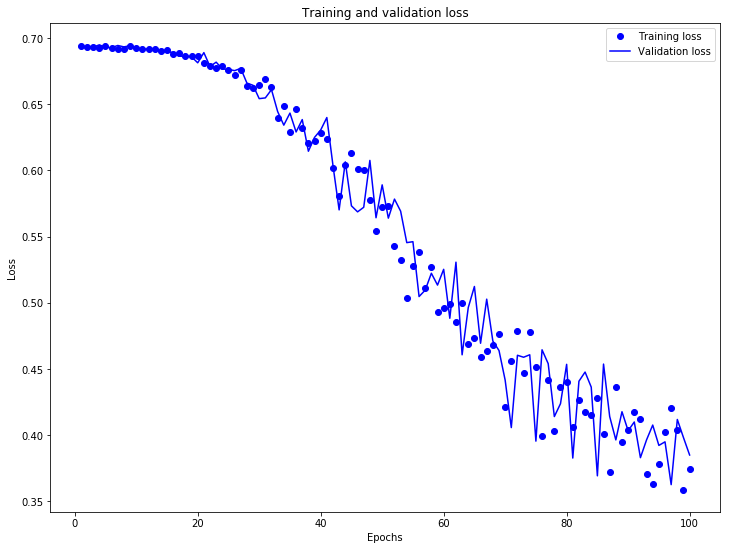

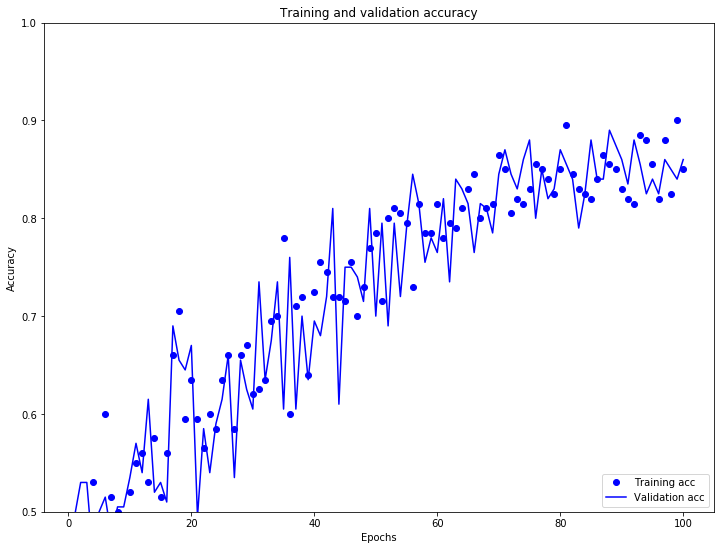

In [21]:
import matplotlib.pyplot as plt

history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,9))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.5,1))
plt.show()

## Retrieve the learned embeddings

Next, let's retrieve the word embeddings learned during training. This will be a matrix of shape `(vocab_size, embedding-dimension)`.

In [22]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(8185, 16)


We will now write the weights to disk. To use the [Embedding Projector](http://projector.tensorflow.org), we will upload two files in tab separated format: a file of vectors (containing the embedding), and a file of meta data (containing the words).

In [23]:
import io

encoder = info.features['text'].encoder

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')

for num, word in enumerate(encoder.subwords):
  vec = weights[num+1] # skip 0, it's padding.
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
out_v.close()
out_m.close()

## Visualize the embeddings

Once our weights files are ready, we will upload them to the Embedding Projector to visualize the learned word embeddings for high dimensional data.

### From the definition:
Embedding Projector is a web application tool that interactively visualizes embeddings by reading them from our model and rendering them in two or three dimension.
After file uploading, you can play with the embeddings on Projector. Like we can search for words to find their closest neighbors.


## Code Reference
https://github.com/tensorflow/docs/blob/master/site/en/tutorials/text/word_embeddings.ipynb